<h2>AdaBoost


In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [134]:
df = pd.DataFrame()

In [135]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [136]:
df.head()

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


<Axes: xlabel='X1', ylabel='X2'>

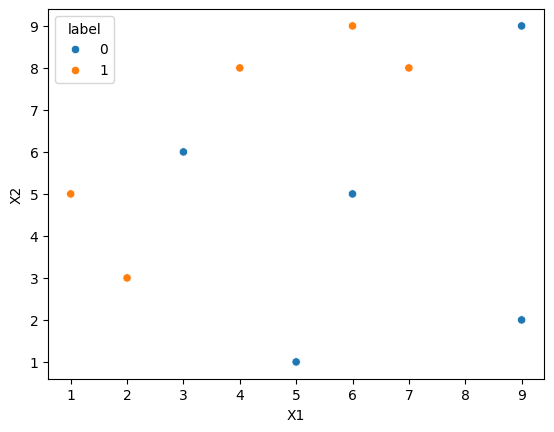

In [137]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [138]:
df['weight'] = 1/df.shape[0]

In [139]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [140]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [141]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [142]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

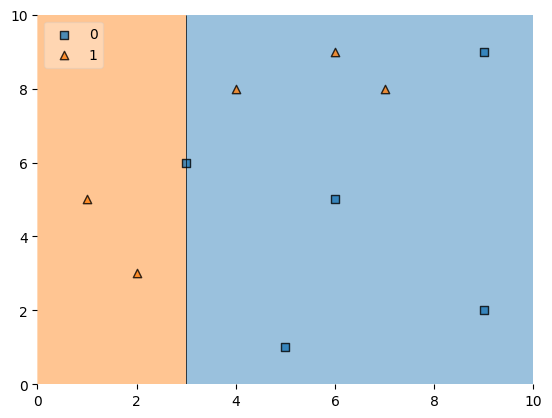

In [143]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [144]:
df['y_pred'] = dt1.predict(x)

In [145]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [146]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [147]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [148]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [149]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [150]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [151]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [152]:
df

,X1,X2,label,weight,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [153]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [154]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [155]:
df

,X1,X2,label,weight,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [156]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [157]:
index_values = create_new_dataset(df)

index_values

[3, 5, 6, 9, 0, 7, 7, 4, 4, 5]

In [158]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [159]:
second_df

,X1,X2,label,weight
3,4,8,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
9,9,2,0,0.1
0,1,5,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1


In [160]:
dt2 = DecisionTreeClassifier(max_depth=1)
     

In [161]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [162]:
dt2.fit(x,y)     

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

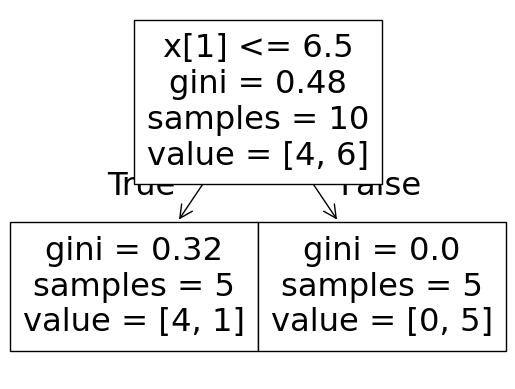

In [163]:
plot_tree(dt2)

<Axes: >

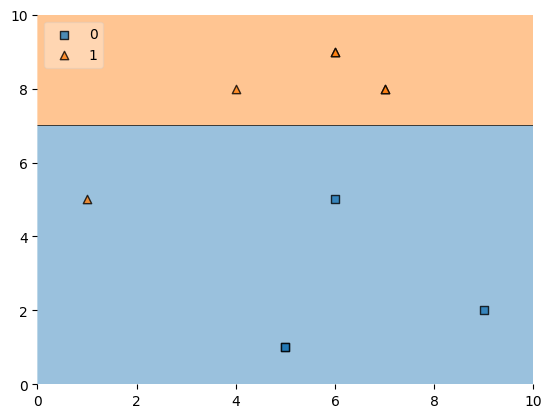

In [165]:
plot_decision_regions(x, y, clf=dt2, legend=2)

In [166]:

second_df['y_pred'] = dt2.predict(x)
     

In [167]:
second_df

,X1,X2,label,weight,y_pred
3,4,8,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,0
9,9,2,0,0.1,0
0,1,5,1,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,1


In [168]:
alpha2 = calculate_model_weight(0.1)

In [169]:

alpha2

np.float64(1.0986122886681098)

In [172]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [173]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
     

In [174]:

second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [175]:

second_df
     

,X1,X2,label,weight,y_pred,updated_weights,nomalized_weights
3,4,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,0,0.297427,0.495694
7,7,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034


In [176]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [177]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']